# Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle


origin_data = pd.read_csv('./dataset/sleep-time-new.csv')
origin_data.head(10)

,Unnamed: 0,old,feels,23h-1h,1h-3h,3h-5h,5h-7h,7h-9h,9h-11h,11h-13h,13h-15h,15h-17h,17h-19h,19h-21h,21h-23h,total_hours,result
0,0,20,0,0,1,1,1,1,0,0,0,0,0,0,0,8.0,4.0
1,1,20,1,1,1,1,0,0,0,1,0,0,0,0,0,8.0,1.0
2,2,21,1,1,1,1,0,0,0,0,0,0,0,0,1,8.0,1.0
3,3,20,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
4,4,21,0,0,1,1,1,0,0,1,0,0,0,1,0,10.0,3.0
5,5,21,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,4.0
6,6,21,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,3.0
7,7,40,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
8,8,21,1,1,1,0,0,0,0,0,0,0,0,0,0,4.0,2.0
9,9,20,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,3.0


In [2]:
new_data = origin_data.copy()
new_data.drop(columns=new_data.columns[0], inplace=True)
new_data = shuffle(new_data)
new_data = new_data.reset_index()
new_data.drop(columns=new_data.columns[0], inplace=True)
new_data.head()

,old,feels,23h-1h,1h-3h,3h-5h,5h-7h,7h-9h,9h-11h,11h-13h,13h-15h,15h-17h,17h-19h,19h-21h,21h-23h,total_hours,result
0,27,0,0,0,0,0,0,0,0,1,0,0,0,0,2.0,5.0
1,26,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
2,16,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
3,17,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
4,15,1,1,1,1,1,0,0,0,1,0,0,0,0,10.0,1.0


In [3]:
# # drop first column
# new_data = origin_data.copy()
# new_data.drop(new_data.columns[0], inplace=True, axis=1)

# # rename featire
# new_data.columns = ['time', 'old', 'feels', 'status'] 

# # clear by regex
# new_data['status'] = new_data['status'].apply(str).str.strip()
# new_data['status'] = new_data['status'].apply(str).str.replace('\\r', '')

# # print(new_data.head(15)) 

# # add 12 time frame features
# empty_col = np.array([0]*new_data.shape[0])
key_time_frame = ['23h-1h', '1h-3h', '3h-5h', '5h-7h', '7h-9h', '9h-11h', '11h-13h', '13h-15h', '15h-17h', '17h-19h', '19h-21h', '21h-23h']
# for time_frame in key_time_frame:
#     new_data[time_frame] = empty_col
    
# # fill data into 12 time frame features
# time_list = new_data['time'].values
# time_list_length = len(time_list)
# for i in range(time_list_length):
#     time_str = str(time_list[i])
#     time_frame_selected = time_str.replace(" ", "").split(",")
#     new_data.loc[i, time_frame_selected] = 1

# # remove time column
# new_data.drop(new_data.columns[0], inplace=True, axis=1)

# # one-hot encode to feels feature
# length_row = new_data.shape[0]
# for i in range(length_row):
#     if new_data.loc[i, 'feels'] == "Không":
#         new_data.loc[i, 'feels'] = 0
#     else:
#         new_data.loc[i, 'feels'] = 1
        
# # add column total hours
# for i in range(length_row):
#     new_data.loc[i, 'total_hours'] = sum(new_data.loc[i, key_time_frame].values)*2
    
# # encode status feature
# key_status = {
#     1: "rất tốt",
#     2: "tốt",
#     3: "bình thường",
#     4: "tệ",
#     5: "rất tệ"
# }

# for i in range(length_row):
#     for key in key_status:
#         if str(new_data.loc[i, 'status']).lower() == key_status[key]:
#             new_data.loc[i, 'result'] = key
            
# # remove status column
# new_data.drop('status', inplace=True, axis=1)

# # new_data.to_csv('new_data.csv')
# new_data.head(10)

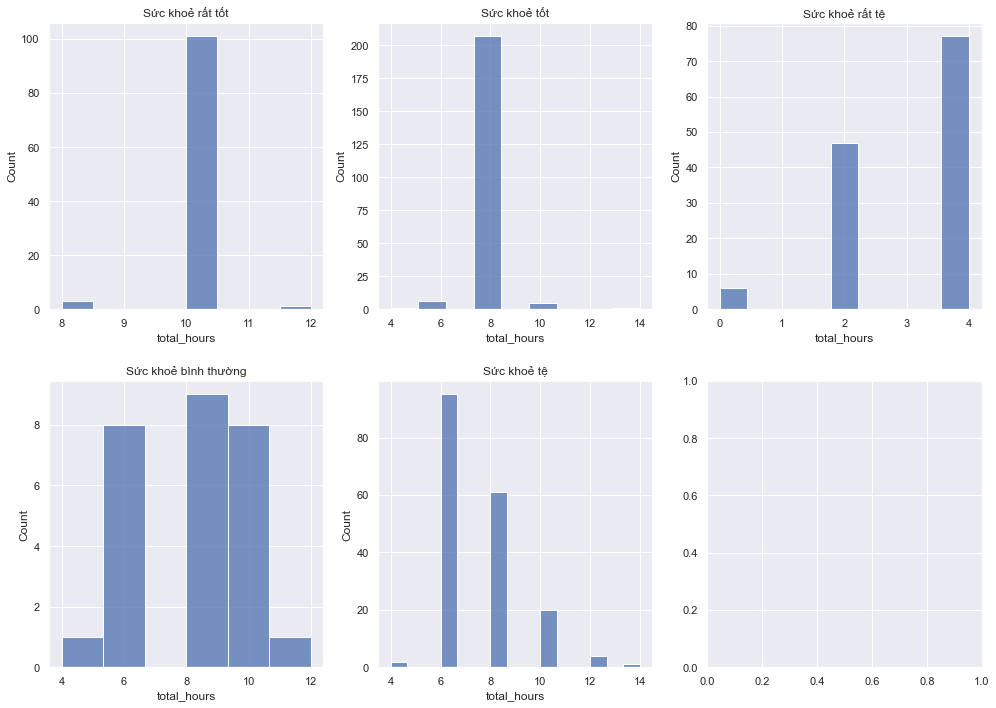

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(2, 3,figsize=(14, 10))
# sns.despine(f)

def histplot_total_time(key, ax, title):
    # print(new_data[new_data['result'] == key]['total_hours'].shape)
    sns.histplot(
        data= new_data[new_data['result'] == key]['total_hours'],
        ax=ax,
    )
    ax.set_title(title)

histplot_total_time(1, ax[0, 0], "Sức khoẻ rất tốt")
histplot_total_time(2, ax[0, 1], "Sức khoẻ tốt")
histplot_total_time(3, ax[1, 0], "Sức khoẻ bình thường")
histplot_total_time(4, ax[1, 1], "Sức khoẻ tệ")
histplot_total_time(5, ax[0, 2], "Sức khoẻ rất tệ")
plt.tight_layout()
plt.rcParams["figure.autolayout"] = True
plt.subplots_adjust(hspace = 0.25)


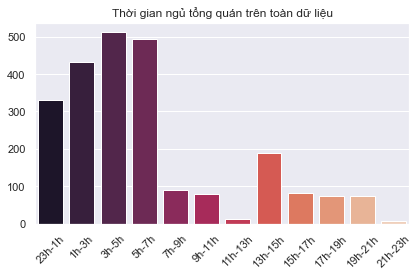

In [5]:

sum_time_frame_data = []
for time_frame in key_time_frame:
    sum_time_frame_data.append(sum(new_data[time_frame].values))
# sum_time_frame_data

sns.barplot(x=key_time_frame, y=sum_time_frame_data, palette="rocket")
plt.title("Thời gian ngủ tổng quán trên toàn dữ liệu")
plt.xticks(rotation=45)
plt.rcParams["figure.autolayout"] = True
plt.show()

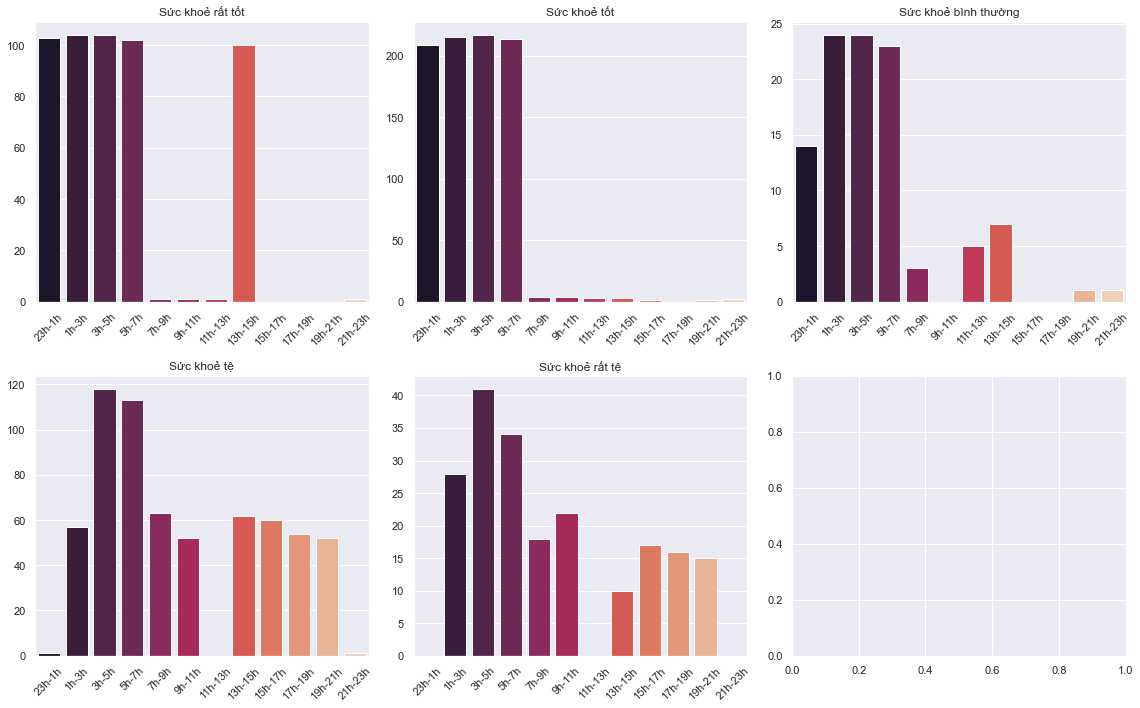

In [6]:
def barplot_time_frame(data, total_hours, ax, title):
    sum_time_frame_data = []
    data = data[data['total_hours'] <= total_hours]
    for time_frame in key_time_frame:
        sum_time_frame_data.append(sum(data[time_frame].values))
    sns.barplot(x=key_time_frame, y=sum_time_frame_data, palette="rocket", ax=ax)
    ax.set_title(title)
    ax.tick_params(labelrotation=45, axis='x')

f, ax = plt.subplots(2, 3,figsize=(16, 10))

max_total_hours = 10
barplot_time_frame(new_data[new_data['result'] == 1], max_total_hours, ax[0,0], "Sức khoẻ rất tốt")
barplot_time_frame(new_data[new_data['result'] == 2], max_total_hours, ax[0,1], "Sức khoẻ tốt")
barplot_time_frame(new_data[new_data['result'] == 3], max_total_hours, ax[0,2], "Sức khoẻ bình thường")
barplot_time_frame(new_data[new_data['result'] == 4], max_total_hours, ax[1,0], "Sức khoẻ tệ")
barplot_time_frame(new_data[new_data['result'] == 5], max_total_hours, ax[1,1], "Sức khoẻ rất tệ")


plt.tight_layout()
plt.rcParams["figure.autolayout"] = True
plt.show()

### Show plot each log

In [7]:
# data = new_data[(new_data['total_hours'] <= 6 )& (new_data['result'] == 3)]
# data.reset_index(inplace=True)
# # data.head()

# for i in range(data.shape[0]):
#     f, ax = plt.subplots(figsize=(10, 5))
#     sns.barplot(x=key_time_frame, y=data.loc[i, key_time_frame], palette="rocket")
#     # ax.set_title(title)
#     plt.xticks(rotation=45)   

# Train Model

In [8]:
new_data.head(15)

,old,feels,23h-1h,1h-3h,3h-5h,5h-7h,7h-9h,9h-11h,11h-13h,13h-15h,15h-17h,17h-19h,19h-21h,21h-23h,total_hours,result
0,27,0,0,0,0,0,0,0,0,1,0,0,0,0,2.0,5.0
1,26,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
2,16,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
3,17,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
4,15,1,1,1,1,1,0,0,0,1,0,0,0,0,10.0,1.0
5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,5.0
6,24,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,5.0
7,23,0,0,1,0,1,1,1,0,0,0,0,0,0,8.0,4.0
8,31,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0
9,20,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,2.0


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
scaler = StandardScaler()

features_data = new_data.iloc[:, 0:-1].copy()
labels_data = new_data['result'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    features_data.values, labels_data.values, test_size=0.3, random_state=7)  # 70% training and 30% test

# encoding train labels 
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
y_test = encoder.transform(y_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.9397849462365592 

Best C: 1 

Best Kernel: linear 

Best Gamma: scale 



In [11]:
final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test_scaled)
Y_pred = list(encoder.inverse_transform(y_pred))


In [12]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test ))

svm_model.score

[[20  0  0  1  0]
 [ 3 60  1  0  0]
 [ 2  2  2  3  0]
 [ 0  1  1 64  1]
 [ 0  0  0  0 39]]


              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.95      0.94      0.94        64
           2       0.50      0.22      0.31         9
           3       0.94      0.96      0.95        67
           4       0.97      1.00      0.99        39

    accuracy                           0.93       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.92      0.93      0.92       200

Training set score for SVM: 0.963441
Testing  set score for SVM: 0.925000


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>